## Problem Statement

#### Nowadays it is very common for a person to move or relocate to a new city, it could be for a job, startup or any related reason. 
#### The biggest problem a person face is to find a good place to stay that should be available nearby, should be in budget and must include other essential amenities.
#### The given dataset contains the information about some properties availabel in metropolitan cities like - Pune, Mumbai, Kolkata etc. 

## Objective :

#### (i) Perform an Exploratory Data Analysis on the given dataset to show on what basis a person can find the best property as per their need.
#### (ii) Implement a Machine Learning Model to predict the price of the properties.

####  

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
df = pd.read_csv('metropolitan_properties.csv')

### Printing the Dataset

In [3]:
df

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,count
0,OWNER,2,BHK,Apartment,Bodakdev,20000,1450,Furnished,2,Ahmedabad,1
1,OWNER,1,RK,Studio Apartment,CG Road,7350,210,Semi-Furnished,1,Ahmedabad,1
2,OWNER,3,BHK,Apartment,Jodhpur,22000,1900,Unfurnished,3,Ahmedabad,1
3,OWNER,2,BHK,Independent House,Sanand,13000,1285,Semi-Furnished,2,Ahmedabad,1
4,OWNER,2,BHK,Independent House,Navrangpura,18000,1600,Furnished,2,Ahmedabad,1
...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1,BHK,Apartment,Chinchwad,13250,650,Semi-Furnished,1,Pune,1
193007,OWNER,1,RK,Studio Apartment,Wadgaon Sheri,7000,350,Unfurnished,1,Pune,1
193008,OWNER,1,BHK,Apartment,Kothrud,8500,389,Semi-Furnished,1,Pune,1
193009,AGENT,1,BHK,Apartment,Wakad,16500,670,Semi-Furnished,2,Pune,1


### Check the no. of Rows and Columns

In [4]:
df.shape

(193011, 11)

### Observation :
* There are 11 Features and 193011 attributes present in the Dataset.


### Rearranging the dataset

In [5]:
df = df[['seller_type','layout_type','property_type','furnish_type','bedroom','bathroom','city','locality','area','price','count']]

### List the columns Present in the Dataset

In [6]:
df.columns

Index(['seller_type', 'layout_type', 'property_type', 'furnish_type',
       'bedroom', 'bathroom', 'city', 'locality', 'area', 'price', 'count'],
      dtype='object')

### Dropping the unwanted features of the dataset

In [7]:
df.drop(['locality'],axis = 1,inplace = True)

### Observation :
* Dropping feature 'locality' from the dataset.

### Print the Cleaned dataset

In [8]:
df

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
0,OWNER,BHK,Apartment,Furnished,2,2,Ahmedabad,1450,20000,1
1,OWNER,RK,Studio Apartment,Semi-Furnished,1,1,Ahmedabad,210,7350,1
2,OWNER,BHK,Apartment,Unfurnished,3,3,Ahmedabad,1900,22000,1
3,OWNER,BHK,Independent House,Semi-Furnished,2,2,Ahmedabad,1285,13000,1
4,OWNER,BHK,Independent House,Furnished,2,2,Ahmedabad,1600,18000,1
...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,BHK,Apartment,Semi-Furnished,1,1,Pune,650,13250,1
193007,OWNER,RK,Studio Apartment,Unfurnished,1,1,Pune,350,7000,1
193008,OWNER,BHK,Apartment,Semi-Furnished,1,1,Pune,389,8500,1
193009,AGENT,BHK,Apartment,Semi-Furnished,1,2,Pune,670,16500,1


### To print the first 5 records of the dataset

In [9]:
df.head()

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
0,OWNER,BHK,Apartment,Furnished,2,2,Ahmedabad,1450,20000,1
1,OWNER,RK,Studio Apartment,Semi-Furnished,1,1,Ahmedabad,210,7350,1
2,OWNER,BHK,Apartment,Unfurnished,3,3,Ahmedabad,1900,22000,1
3,OWNER,BHK,Independent House,Semi-Furnished,2,2,Ahmedabad,1285,13000,1
4,OWNER,BHK,Independent House,Furnished,2,2,Ahmedabad,1600,18000,1


### To print last 5 records of the dataset

In [10]:
df.tail()

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
193006,OWNER,BHK,Apartment,Semi-Furnished,1,1,Pune,650,13250,1
193007,OWNER,RK,Studio Apartment,Unfurnished,1,1,Pune,350,7000,1
193008,OWNER,BHK,Apartment,Semi-Furnished,1,1,Pune,389,8500,1
193009,AGENT,BHK,Apartment,Semi-Furnished,1,2,Pune,670,16500,1
193010,AGENT,BHK,Apartment,Unfurnished,2,2,Pune,800,12000,1


### To check is there any null values present in the dataset

In [11]:
df.isnull().sum()

seller_type      0
layout_type      0
property_type    0
furnish_type     0
bedroom          0
bathroom         0
city             0
area             0
price            0
count            0
dtype: int64

### Observation :
* There are no null values present in the dataset.

### Print Statistical information about the dataset

In [12]:
df.describe()

,bedroom,bathroom,area,price,count
count,193011.000000,193011.000000,193011.000000,1.930110e+05,193011.0
mean,2.081679,2.059883,1264.606007,4.433654e+04,1.0
std,0.956901,0.934805,1043.723920,9.195199e+04,0.0
min,1.000000,1.000000,100.000000,1.200000e+03,1.0
25%,1.000000,1.000000,650.000000,1.300000e+04,1.0
50%,2.000000,2.000000,1000.000000,2.100000e+04,1.0
75%,3.000000,3.000000,1440.000000,3.600000e+04,1.0
max,15.000000,19.000000,19800.000000,5.885000e+06,1.0


### Observation :

* The Average Area of the property is 1264.6 sqft.
* The Average number of bedrooms available in the given properties are 2.
* The Average number of bathrooms available in the given properties are 2. 

## Print the info of the Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   seller_type    193011 non-null  object
 1   layout_type    193011 non-null  object
 2   property_type  193011 non-null  object
 3   furnish_type   193011 non-null  object
 4   bedroom        193011 non-null  int64 
 5   bathroom       193011 non-null  int64 
 6   city           193011 non-null  object
 7   area           193011 non-null  int64 
 8   price          193011 non-null  int64 
 9   count          193011 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 14.7+ MB


### Observation :
* The above output shows the information about each feature in the dataset.
* There are 10 features present in the dataset after cleaning: 
    - 5 features are consist of 'int' data type.
    - 5 features are consist of 'object' data type 
    - All the features are non-null.


## Sorting Data

In [14]:
df.sort_values(['price'],ascending=False).head(10) 

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
70682,AGENT,BHK,Independent House,Unfurnished,12,4,Delhi,15562,5885000,1
72080,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,17211,4129000,1
72072,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,17211,4129000,1
72922,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,15515,4011000,1
72312,AGENT,BHK,Villa,Unfurnished,8,8,Delhi,11010,4010000,1
72923,AGENT,BHK,Independent House,Unfurnished,10,5,Delhi,16521,3746000,1
71390,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,18521,3624000,1
79878,AGENT,BHK,Villa,Semi-Furnished,12,12,Delhi,19800,3500000,1
77767,AGENT,BHK,Villa,Semi-Furnished,6,6,Delhi,11000,3500000,1
75797,AGENT,BHK,Villa,Unfurnished,14,4,Delhi,15562,2255000,1


### Observation :-
* By sorting the values as per price, we can observe that the maximum price of property is Rs. 58,85,000.
* This property is selling by an Agent.
* The property is present in Delhi and Area of property is 15562 sqft.
* Property_Type is Independent, and comes as Unfurnished.
* It consist of 12 Bedrooms with 4 Bathroom.

In [15]:
df.sort_values(['price']).head(10) 

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
76772,AGENT,RK,Studio Apartment,Furnished,1,1,Delhi,220,1200,1
99651,OWNER,RK,Studio Apartment,Unfurnished,1,1,Kolkata,200,1500,1
161394,OWNER,RK,Studio Apartment,Semi-Furnished,1,1,Mumbai,310,1500,1
161416,OWNER,RK,Studio Apartment,Semi-Furnished,1,1,Mumbai,310,1500,1
92703,OWNER,BHK,Independent Floor,Unfurnished,1,1,Hyderabad,260,1500,1
88245,OWNER,BHK,Apartment,Semi-Furnished,1,1,Hyderabad,200,1500,1
36620,OWNER,BHK,Independent Floor,Unfurnished,1,1,Bangalore,250,1500,1
91574,OWNER,BHK,Independent Floor,Unfurnished,1,1,Hyderabad,260,1500,1
92441,OWNER,RK,Studio Apartment,Unfurnished,1,1,Hyderabad,250,1500,1
99997,OWNER,RK,Studio Apartment,Semi-Furnished,1,1,Kolkata,250,1500,1


### Observation :-
* By sorting the values as per price, we can observe that the minimum price of property is Rs. 1200.
* This property is selling by an Agent.
* The property is present in Delhi and Area of property is 220 sqft.
* Property_Type is Studio Apartment, and comes as Furnished.
* It consist of 1 Bedrooms with 1 Bathroom.

In [16]:
df.sort_values(['area'],ascending=False).head(10) 

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
79878,AGENT,BHK,Villa,Semi-Furnished,12,12,Delhi,19800,3500000,1
71207,AGENT,BHK,Independent House,Unfurnished,14,14,Delhi,18541,1741000,1
71369,AGENT,BHK,Independent House,Unfurnished,14,14,Delhi,18541,1741000,1
71390,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,18521,3624000,1
72080,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,17211,4129000,1
72072,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,17211,4129000,1
72923,AGENT,BHK,Independent House,Unfurnished,10,5,Delhi,16521,3746000,1
75797,AGENT,BHK,Villa,Unfurnished,14,4,Delhi,15562,2255000,1
70682,AGENT,BHK,Independent House,Unfurnished,12,4,Delhi,15562,5885000,1
72922,AGENT,BHK,Villa,Unfurnished,15,5,Delhi,15515,4011000,1


### Observation :-
* By sorting the values as per area, we can observe that the maximum area of property is 19800 sqft.
* This property is selling by an Agent.
* The property is present in Delhi and Price of property is Rs. 35,00,000.
* Property_Type is Villa, and comes as Semi-Furnished.
* It consist of 12 Bedrooms with 12 Bathroom.

In [17]:
df.sort_values(['area']).head(10) 

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
186107,AGENT,BHK,Apartment,Semi-Furnished,1,1,Pune,100,15000,1
186106,AGENT,BHK,Apartment,Semi-Furnished,1,1,Pune,100,15000,1
75692,AGENT,BHK,Independent House,Furnished,1,1,Delhi,100,11000,1
75691,AGENT,BHK,Independent House,Furnished,1,1,Delhi,100,11000,1
75690,AGENT,BHK,Independent House,Furnished,1,1,Delhi,100,10000,1
75694,AGENT,BHK,Independent House,Furnished,1,1,Delhi,100,12000,1
31868,AGENT,BHK,Independent House,Semi-Furnished,2,2,Bangalore,100,17500,1
186102,AGENT,BHK,Apartment,Semi-Furnished,1,1,Pune,100,15000,1
75693,AGENT,BHK,Independent House,Furnished,1,1,Delhi,100,12000,1
186105,AGENT,BHK,Apartment,Semi-Furnished,1,1,Pune,100,15000,1


### Observation :-
* By sorting the values as per area, we can observe that the minimum area of property is 100 sqft.
* This property is selling by an Agent.
* The property is present in Pune and Price of property is Rs. 15,000.
* Property_Type is Apartment, and comes as Semi-Furnished.
* It consist of 1 Bedrooms with 1 Bathroom.

## Pivot Table and Visualisation

In [18]:
print('properties available as per seller_type ')
d1 = df.copy()
pivot1 = d1.pivot_table(index = ['seller_type'],
                       values = ['count'],sort = ('seller_type'),aggfunc = 'count'
                       )
pivot1

properties available as per seller_type 


,count
seller_type,
AGENT,152951
BUILDER,1346
OWNER,38714


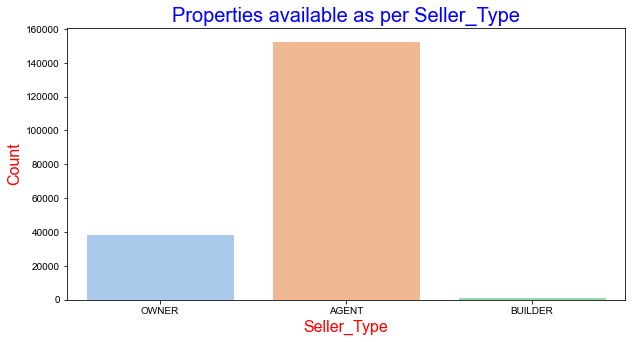

In [19]:
fig = plt.subplots(figsize=(10, 5))
sns.set()
sns.countplot(df.seller_type,palette = 'pastel')
plt.title('Properties available as per Seller_Type',fontsize = 20,color = 'blue')
plt.xlabel('Seller_Type',fontsize = 16,color = 'red')
plt.ylabel('Count',fontsize = 16,color = 'red')
plt.show()

### Observation :- 
* From above pivot_table and countplot we can say that AGENT has the maximum number of properties.

In [20]:
print('properties available as per property_types')
d1 = df.copy()
pivot2 = d1.pivot_table(index = ['property_type'],
                       values = ['count'],sort = ('seller_type'),aggfunc = 'count'
                       )
pivot2

properties available as per property_types


,count
property_type,
Apartment,140356
Independent Floor,27283
Independent House,12838
Penthouse,156
Studio Apartment,9263
Villa,3115


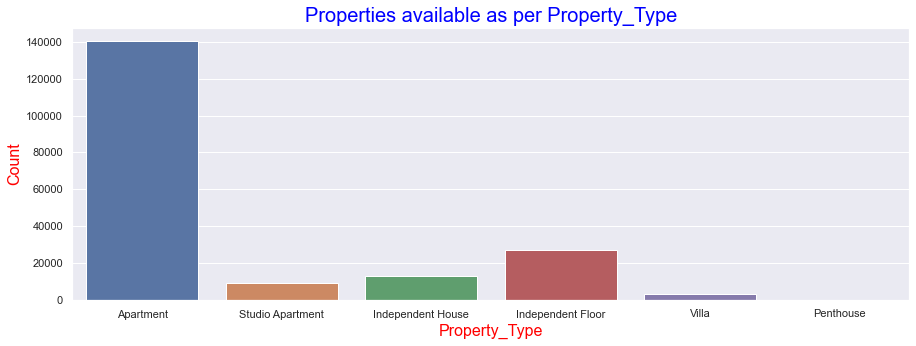

In [21]:
fig = plt.subplots(figsize=(15, 5))
sns.countplot(df.property_type)
plt.title('Properties available as per Property_Type',fontsize = 20,color = 'blue')
plt.xlabel('Property_Type',fontsize = 16,color = 'red')
plt.ylabel('Count',fontsize = 16,color = 'red')
plt.show()

### Observation :- 
* From above pivot_table and countplot we can observe that maximum properties are available as Apartments.

In [22]:
print('properties available as per furnish_type')
d1 = df.copy()
pivot3 = d1.pivot_table(index = ['furnish_type'],
                       values = ['count'],sort = ('furnish_type'),aggfunc = 'count'
                       )
pivot3

properties available as per furnish_type


,count
furnish_type,
Furnished,38589
Semi-Furnished,95726
Unfurnished,58696


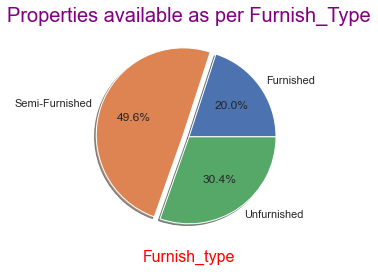

In [23]:
pivot3['count'].plot.pie(autopct='%1.1f%%',shadow=True,explode = (0,0.07,0))
plt.title('Properties available as per Furnish_Type',fontsize = 20,color = 'Purple' )
plt.xlabel('Furnish_type',fontsize=16,color='red')
plt.ylabel('')
plt.show()

### Observation :- 
* From above pivot_table and pie chart we can observe that maximum properties are available as Semi-Furnished.

In [24]:
print('properties available as per cities')
d1 = df.copy()
pivot4 = d1.pivot_table(index = ['city'],
                       values = ['count'],sort = ('city'),aggfunc = 'count'
                       )
pivot4

properties available as per cities


,count
city,
Ahmedabad,18453
Bangalore,23072
Chennai,8658
Delhi,32608
Hyderabad,10544
Kolkata,9664
Mumbai,67416
Pune,22596


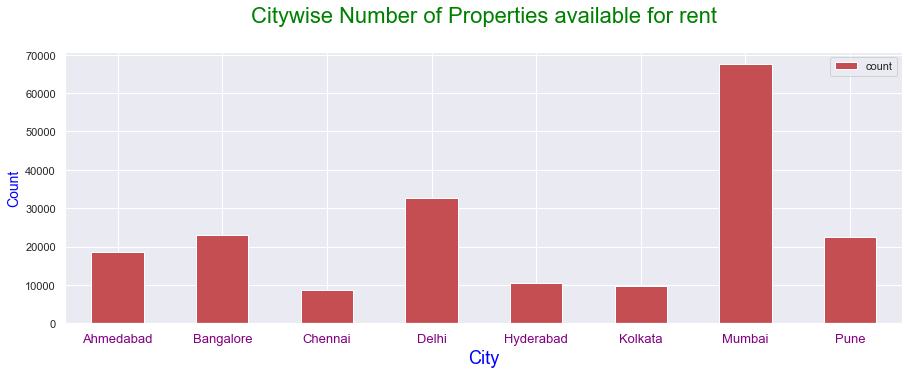

In [25]:
d1.groupby('city')[['count']].count().plot.bar(color='r',figsize=(15,5))
plt.title('Citywise Number of Properties available for rent\n',fontsize=22,color='green')
plt.xlabel('City',fontsize=18,color = 'blue')
plt.ylabel('Count',fontsize=14,color='blue')
plt.xticks(rotation=0,fontsize=13,color='purple')
plt.show()

### Observation :- 
* From above pivot_table and barplot we can observe that Mumbai has the maximum number properties.

In [26]:
print('Maximum Price of Properties with respect to Cities')
d1 = df.copy()
pivot5 = d1.pivot_table(index = ['city'],
                       values = ['price'],sort = ('city'),aggfunc = 'max'
                       )
pivot5

Maximum Price of Properties with respect to Cities


,price
city,
Ahmedabad,380000
Bangalore,900000
Chennai,600000
Delhi,5885000
Hyderabad,600000
Kolkata,750000
Mumbai,1600000
Pune,550000


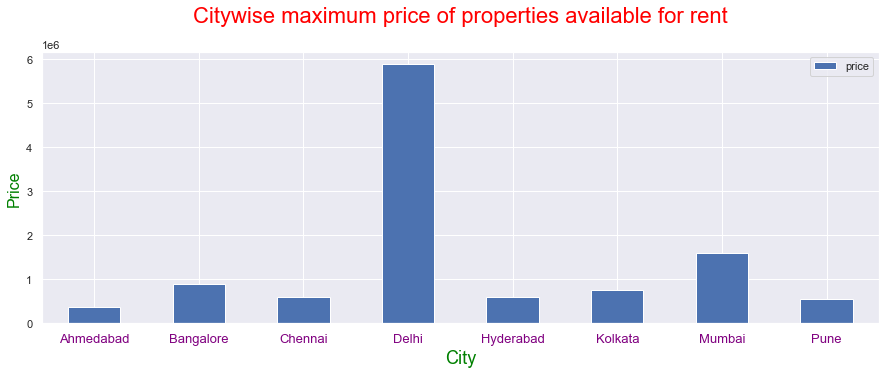

In [27]:
d1.groupby('city')[['price']].max().plot.bar(color='b',figsize=(15,5))
plt.title('Citywise maximum price of properties available for rent\n',color='red',fontsize=22)
plt.xlabel('City',fontsize=18,color = 'green')
plt.ylabel('Price',fontsize=16,color = 'green')
plt.legend()
plt.xticks(rotation=0,fontsize=13,color='purple')
plt.show()

### Observation :- 
* From above pivot_table and barplot we can observe that Delhi has the highest rates of properties.

In [28]:
print('Minimum Price of Properties with respect to Cities')
d1 = df.copy()
pivot6 = d1.pivot_table(index = ['city'],
                       values = ['price'],sort = ('city'),aggfunc = 'min'
                       )
pivot6

Minimum Price of Properties with respect to Cities


,price
city,
Ahmedabad,3500
Bangalore,1500
Chennai,2000
Delhi,1200
Hyderabad,1500
Kolkata,1500
Mumbai,1500
Pune,1700


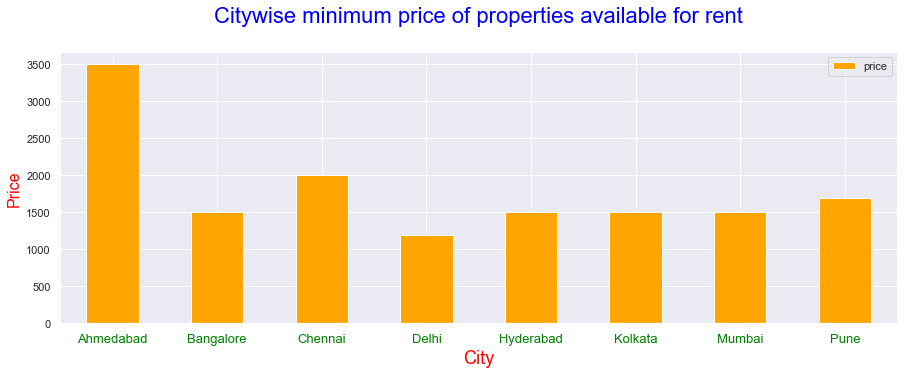

In [29]:
d1.groupby('city')[['price']].min().plot.bar(color='orange',figsize=(15,5))
plt.title('Citywise minimum price of properties available for rent\n',color='blue',fontsize=22)
plt.xlabel('City',fontsize=18,color = 'red')
plt.ylabel('Price',fontsize=16,color = 'red')
plt.legend()
plt.xticks(rotation=0,fontsize=13,color='green')
plt.show()

### Observation :- 
* From above pivot_table and barplot we can observe that properties rates are lower in Delhi.

In [30]:
print('Availability of Bedrooms and Bathrooms as per Property_Types')
d1 = df.copy()
pivot7 = d1.pivot_table(index = ['property_type'],
                       values = ['bedroom','bathroom'],sort = ('property_type'),aggfunc = 'max'
                       )
pivot7

Availability of Bedrooms and Bathrooms as per Property_Types


,bathroom,bedroom
property_type,,
Apartment,18,15
Independent Floor,10,12
Independent House,19,15
Penthouse,5,5
Studio Apartment,4,2
Villa,12,15


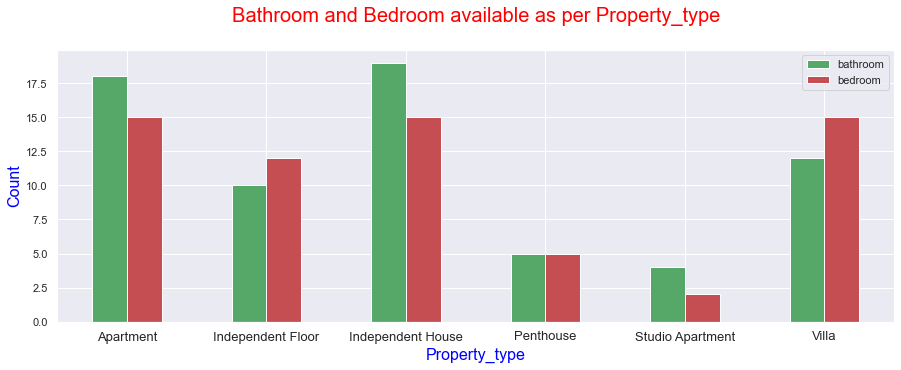

In [31]:
pivot7.groupby('property_type')[['bathroom','bedroom']].max().plot.bar(color=['g','r'],figsize=(15,5),
                                                                       label= ('bathroom','bedroom'))
plt.title('Bathroom and Bedroom available as per Property_type\n',fontsize = 20,color = 'red')
plt.xlabel('Property_type',fontsize=16,color = 'blue')
plt.ylabel('Count',fontsize = 16,color = 'blue')
plt.xticks(rotation=0,fontsize = 13)
plt.show()

### Observation :- 
* From above pivot_table and barplot we can find the maximum number of bedrooms and bathrooms available as per the type of property.

In [32]:
print('Area and Price of Properties according to Cities')
pivot8 = d1.pivot_table(index = ['city','layout_type'],
                       values = ['price','area'],sort = ('furnish_type'),aggfunc = 'min'
                       )
pivot8

Area and Price of Properties according to Cities


area  price
city      layout_type             
Ahmedabad BHK           150   3500
          RK            150   4000
Bangalore BHK           100   1500
          RK            150   1700
Chennai   BHK           150   2900
          RK            150   2000
Delhi     BHK           100   2000
          RK            110   1200
Hyderabad BHK           150   1500
          RK            150   1500
Kolkata   BHK           150   2000
          RK            150   1500
Mumbai    BHK           150   2000
          RK            150   1500
Pune      BHK           100   2300
          RK            150   1700

### Observation :- 
* From above pivot_table we can find the minimum price, area, layout_type, and City of the available property.

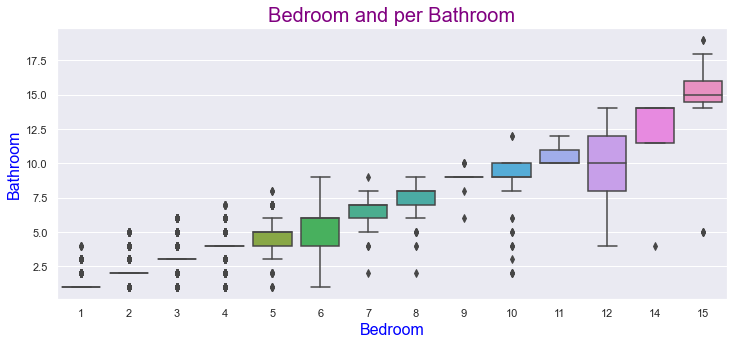

In [33]:
fig = plt.subplots(figsize=(12, 5))
sns.boxplot(df.bedroom,df.bathroom)
plt.title('Bedroom and per Bathroom',fontsize = 20,color = 'purple')
plt.xlabel('Bedroom',fontsize = 16,color = 'blue')
plt.ylabel('Bathroom',fontsize = 16,color = 'blue')
plt.show()

### Observation :- 
* The above boxplot shows the relation between of Bedroom and Bathroom.
    - We can say that there are some exceptional properties which are having more number of bathrooms available as per rooms as compared to average number.

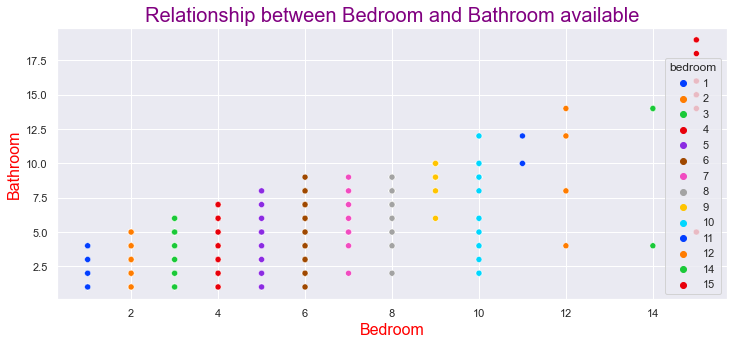

In [34]:
fig = plt.subplots(figsize=(12, 5))
sns.scatterplot(df.bedroom,df.bathroom,hue=df.bedroom,palette = 'bright')
plt.title('Relationship between Bedroom and Bathroom available',fontsize = 20,color = 'purple')
plt.xlabel('Bedroom',fontsize = 16,color = 'red')
plt.ylabel('Bathroom',fontsize = 16,color = 'red')
plt.show()

### Observation :- 
* The above scatter plot shows the relationship between the features Bedroom and Bathroom.
    - We can say that as the number of bedrooms increases, there is an increase in the number of bathrooms also.

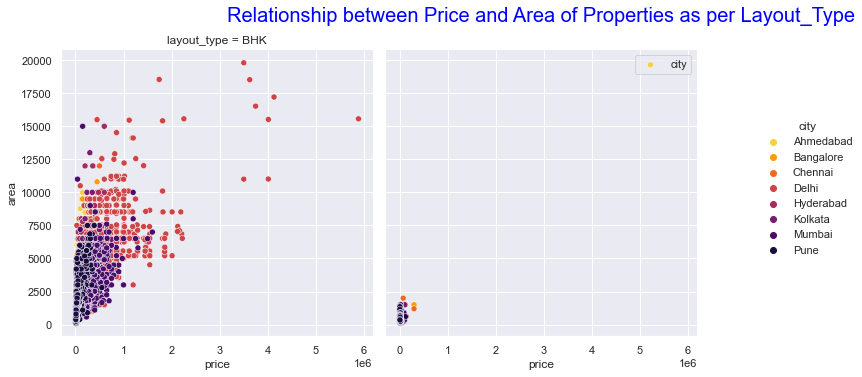

In [38]:
sns.relplot(df.price,df.area,col = df.layout_type,hue = df.city,label=('city'),palette = 'inferno_r')
plt.title('Relationship between Price and Area of Properties as per Layout_Type\n',fontsize= 20,color = 'blue')
plt.legend()
plt.show()

### Observation :- 
* The above relplot shows the relationship between the features Price and Area as per Layout_type.
    - We can say that maximum number of properties are available as BHK layout_type, and present in Pune and Mumbai location.

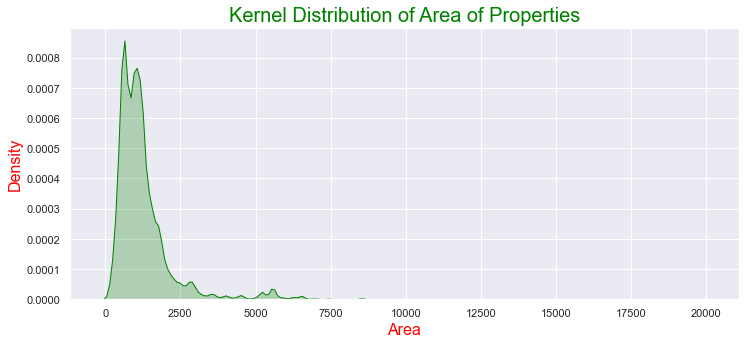

In [39]:
fig = plt.subplots(figsize=(12, 5))
sns.kdeplot(df.area,color='green',shade=True)
plt.title('Kernel Distribution of Area of Properties',fontsize = 20,color = 'green')
plt.xlabel('Area',fontsize = 16,color = 'red')
plt.ylabel('Density',fontsize = 16,color = 'red')
plt.show()

### Observation :
* From the above Univariate Kernal Distribution Estimation(KDE) graph we can say that maximum properties comes with an area under 2500 sqft.

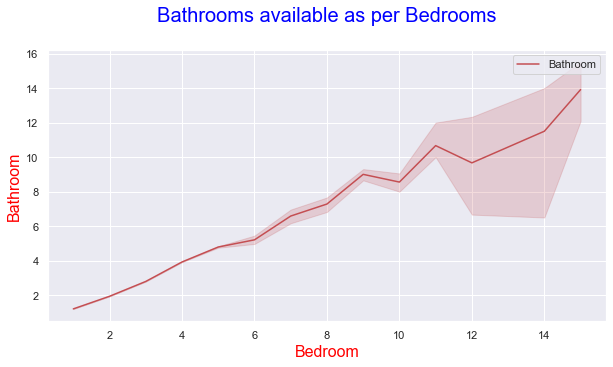

In [40]:
fig = plt.subplots(figsize=(10, 5))
sns.lineplot('bedroom','bathroom',data=df,color='r',label='Bathroom')
plt.title('Bathrooms available as per Bedrooms\n',fontsize=20,color = 'Blue')
plt.xlabel('Bedroom',fontsize=16,color='red')
plt.ylabel('Bathroom',fontsize=16,color='red')
plt.legend()
plt.show()

### Observation :
* In the above line graph we can see the change in availability of Bathrooms as per the increase in number of Bedrooms.

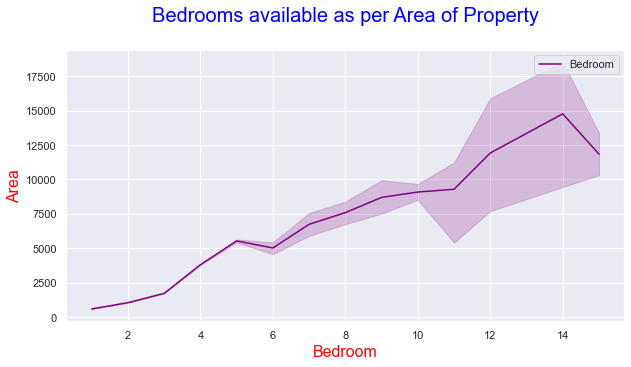

In [41]:
fig = plt.subplots(figsize=(10, 5))
sns.lineplot('bedroom','area',data=df,color='purple',label='Bedroom')
plt.title('Bedrooms available as per Area of Property\n',fontsize=20,color = 'Blue')
plt.xlabel('Bedroom',fontsize=16,color='red')
plt.ylabel('Area',fontsize=16,color='red')
plt.legend()
plt.show()

### Observation :
* In the above line graph we can see the change in availability of Bedrooms as per the increase in the Area of the property.

In [42]:
cor = df.drop(['count'],axis=1)
cor.corr()

,bedroom,bathroom,area,price
bedroom,1.000000,0.875798,0.787947,0.526540
bathroom,0.875798,1.000000,0.778284,0.534605
area,0.787947,0.778284,1.000000,0.756774
price,0.526540,0.534605,0.756774,1.000000


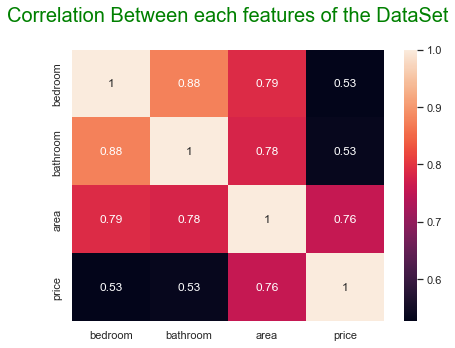

In [43]:
fig = plt.subplots(figsize=(7, 5))
sns.heatmap(cor.corr(),annot = True)
plt.title('Correlation Between each features of the DataSet\n',fontsize = 20,color = 'Green')
plt.show()

### Observation :
* The Heatmap shows that 'bedroom' and 'bathroom' features are highly correlated to each other.

### Implementing Machine Learning Algorithm

### Print the dataset

In [44]:
df

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
0,OWNER,BHK,Apartment,Furnished,2,2,Ahmedabad,1450,20000,1
1,OWNER,RK,Studio Apartment,Semi-Furnished,1,1,Ahmedabad,210,7350,1
2,OWNER,BHK,Apartment,Unfurnished,3,3,Ahmedabad,1900,22000,1
3,OWNER,BHK,Independent House,Semi-Furnished,2,2,Ahmedabad,1285,13000,1
4,OWNER,BHK,Independent House,Furnished,2,2,Ahmedabad,1600,18000,1
...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,BHK,Apartment,Semi-Furnished,1,1,Pune,650,13250,1
193007,OWNER,RK,Studio Apartment,Unfurnished,1,1,Pune,350,7000,1
193008,OWNER,BHK,Apartment,Semi-Furnished,1,1,Pune,389,8500,1
193009,AGENT,BHK,Apartment,Semi-Furnished,1,2,Pune,670,16500,1


### Print the datatypes of all the features

In [45]:
df.dtypes

seller_type      object
layout_type      object
property_type    object
furnish_type     object
bedroom           int64
bathroom          int64
city             object
area              int64
price             int64
count             int64
dtype: object

### Replacing Categorical values to Numeric values

In [46]:
df.seller_type.value_counts()

AGENT      152951
OWNER       38714
BUILDER      1346
Name: seller_type, dtype: int64

In [47]:
df.seller_type.replace({'AGENT':0,'OWNER':1,'BUILDER':2},inplace = True)

In [48]:
df.layout_type.value_counts()

BHK    183748
RK       9263
Name: layout_type, dtype: int64

In [49]:
df.layout_type.replace({'BHK':0,'RK':1},inplace = True)

In [50]:
df.property_type.value_counts()

Apartment            140356
Independent Floor     27283
Independent House     12838
Studio Apartment       9263
Villa                  3115
Penthouse               156
Name: property_type, dtype: int64

In [51]:
df.property_type.replace({'Apartment':0,'Independent Floor':1,'Independent House':2,'Studio Apartment':3,'Villa':4,'Penthouse':5},inplace = True)

In [52]:
df.sort_values('area')

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
186107,0,0,0,Semi-Furnished,1,1,Pune,100,15000,1
186106,0,0,0,Semi-Furnished,1,1,Pune,100,15000,1
75692,0,0,2,Furnished,1,1,Delhi,100,11000,1
75691,0,0,2,Furnished,1,1,Delhi,100,11000,1
75690,0,0,2,Furnished,1,1,Delhi,100,10000,1
...,...,...,...,...,...,...,...,...,...,...
72080,0,0,4,Unfurnished,15,5,Delhi,17211,4129000,1
71390,0,0,4,Unfurnished,15,5,Delhi,18521,3624000,1
71369,0,0,2,Unfurnished,14,14,Delhi,18541,1741000,1
71207,0,0,2,Unfurnished,14,14,Delhi,18541,1741000,1


In [53]:
def ar(x):
    if 0 <= x < 1000:
        return 0
    elif 1000 <= x < 10000:
        return 1
    else :
        return 2

In [54]:
df.area = df.area.apply(ar)

In [55]:
df.furnish_type.value_counts()

Semi-Furnished    95726
Unfurnished       58696
Furnished         38589
Name: furnish_type, dtype: int64

In [56]:
df.furnish_type.replace({'Semi-Furnished':0,'Unfurnished':1,'Furnished':2},inplace = True)

In [57]:
df.city.value_counts()

Mumbai       67416
Delhi        32608
Bangalore    23072
Pune         22596
Ahmedabad    18453
Hyderabad    10544
Kolkata       9664
Chennai       8658
Name: city, dtype: int64

In [58]:
df.city.replace({'Mumbai':0,'Delhi':1,'Bangalore':2,'Pune':3,'Ahmedabad':4,'Hyderabad':5,'Kolkata':6,'Chennai':7},inplace = True)

In [59]:
df.sort_values('price')

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
76772,0,1,3,2,1,1,1,0,1200,1
99651,1,1,3,1,1,1,6,0,1500,1
161394,1,1,3,0,1,1,0,0,1500,1
161416,1,1,3,0,1,1,0,0,1500,1
92703,1,0,1,1,1,1,5,0,1500,1
...,...,...,...,...,...,...,...,...,...,...
72312,0,0,4,1,8,8,1,2,4010000,1
72922,0,0,4,1,15,5,1,2,4011000,1
72072,0,0,4,1,15,5,1,2,4129000,1
72080,0,0,4,1,15,5,1,2,4129000,1


In [60]:
def pr(x):
    if 0 <= x < 1000000:
        return 'Under 10 Lakh'
    elif 1000000 <= x < 2500000:
        return 'Under 25 Lakh'
    elif 2500000 <= x < 5000000:
        return 'Under 50 Lakh'
    else:
        return 'More than 50 Lakh'

In [61]:
df.price = df.price.apply(pr)

In [62]:
df.dtypes

seller_type       int64
layout_type       int64
property_type     int64
furnish_type      int64
bedroom           int64
bathroom          int64
city              int64
area              int64
price            object
count             int64
dtype: object

### Observation :
* From the above datatypes we can see that all our categorical values are changed to numeric values.

### Print the updated dataset

In [63]:
df

,seller_type,layout_type,property_type,furnish_type,bedroom,bathroom,city,area,price,count
0,1,0,0,2,2,2,4,1,Under 10 Lakh,1
1,1,1,3,0,1,1,4,0,Under 10 Lakh,1
2,1,0,0,1,3,3,4,1,Under 10 Lakh,1
3,1,0,2,0,2,2,4,1,Under 10 Lakh,1
4,1,0,2,2,2,2,4,1,Under 10 Lakh,1
...,...,...,...,...,...,...,...,...,...,...
193006,1,0,0,0,1,1,3,0,Under 10 Lakh,1
193007,1,1,3,1,1,1,3,0,Under 10 Lakh,1
193008,1,0,0,0,1,1,3,0,Under 10 Lakh,1
193009,0,0,0,0,1,2,3,0,Under 10 Lakh,1


### Assigning the value to x and y for train and test dataset

In [65]:
x = df.drop(['price','count'],axis = 1)

In [66]:
y = df.price

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

### Print the shape of train and test data

In [69]:
print('Training Data Shape: ',x_train.shape)
print('Training Target Shape: ',y_train.shape)
print('Test Data Shape: ',x_test.shape)
print('Test Target Shape: ',y_test.shape)

Training Data Shape:  (135107, 8)
Training Target Shape:  (135107,)
Test Data Shape:  (57904, 8)
Test Target Shape:  (57904,)


### Observation :-
* Splitting the whole data into trian and test data.
    - Here we have splitted the whole data to 70% for training data.
    - 30% data is splitted for testing data.

### LogisticRegression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
modelLR = LogisticRegression()

In [72]:
modelLR.fit(x_train,y_train)

LogisticRegression()

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
y_predict = modelLR.predict(x_test)

In [75]:
acu_1 = accuracy_score(y_test,y_predict)*100
acu_1

99.91365017960763

In [76]:
from sklearn.metrics import classification_report  

In [77]:
print('LogisticRegression - Classification Report\n')
print(classification_report(y_test,y_predict))

LogisticRegression - Classification Report

               precision    recall  f1-score   support

Under 10 Lakh       1.00      1.00      1.00     57855
Under 25 Lakh       0.42      0.17      0.25        46
Under 50 Lakh       0.00      0.00      0.00         3

     accuracy                           1.00     57904
    macro avg       0.47      0.39      0.42     57904
 weighted avg       1.00      1.00      1.00     57904



In [78]:
from sklearn.metrics import plot_confusion_matrix

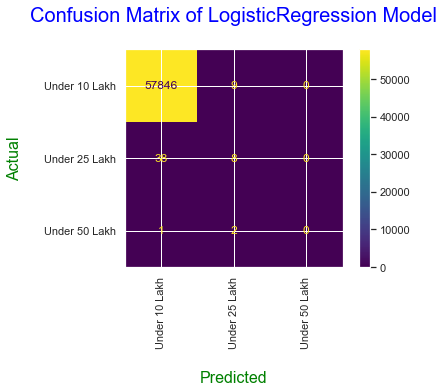

In [79]:
plot_confusion_matrix(modelLR,x_test,y_test)
plt.title('Confusion Matrix of LogisticRegression Model\n',fontsize = 20,color = 'blue')
plt.xlabel('\nPredicted',fontsize=16,color = 'green')
plt.ylabel('Actual\n',fontsize = 16, color = 'green')
plt.xticks(rotation = 90)
plt.show()

### Observation :-
* By applying Logistic Regression, model accuracy is 99.89%.

### DecisionTreeClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
modelDT = DecisionTreeClassifier()

In [82]:
modelDT.fit(x_train,y_train)

DecisionTreeClassifier()

In [83]:
y_predict2 = modelDT.predict(x_test)

In [84]:
acu_2 = accuracy_score(y_test,y_predict2)*100
acu_2

99.91365017960763

In [85]:
print('DecisionTreeClassifier - Classification Report\n')
print(classification_report(y_test,y_predict2))

DecisionTreeClassifier - Classification Report

                   precision    recall  f1-score   support

More than 50 Lakh       0.00      0.00      0.00         0
    Under 10 Lakh       1.00      1.00      1.00     57855
    Under 25 Lakh       0.46      0.13      0.20        46
    Under 50 Lakh       0.00      0.00      0.00         3

         accuracy                           1.00     57904
        macro avg       0.37      0.28      0.30     57904
     weighted avg       1.00      1.00      1.00     57904



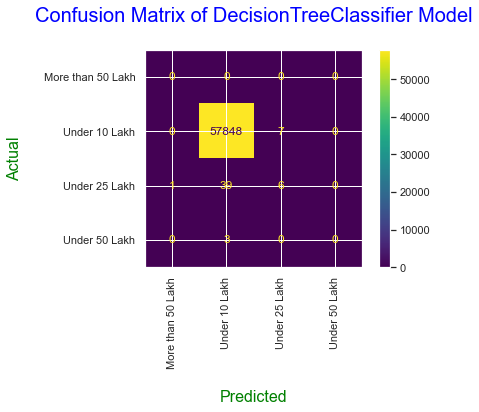

In [86]:
plot_confusion_matrix(modelDT,x_test,y_test)
plt.title('Confusion Matrix of DecisionTreeClassifier Model\n',fontsize = 20,color = 'blue')
plt.xlabel('\nPredicted',fontsize=16,color = 'green')
plt.ylabel('Actual\n',fontsize = 16, color = 'green')
plt.xticks(rotation = 90)
plt.show()

### Observation :-
* By applying DecisionTreeClassifier, model accuracy is 99.89%.

### RandomForestClassifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
modelRF = RandomForestClassifier()

In [89]:
modelRF.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
y_predict3 = modelRF.predict(x_test)

In [91]:
acu_3 = accuracy_score(y_test,y_predict3)*100
acu_3

99.92055816523902

In [92]:
print('RandomForestClassifier - Classification Report\n')
print(classification_report(y_test,y_predict3))

RandomForestClassifier - Classification Report

               precision    recall  f1-score   support

Under 10 Lakh       1.00      1.00      1.00     57855
Under 25 Lakh       0.62      0.17      0.27        46
Under 50 Lakh       0.00      0.00      0.00         3

     accuracy                           1.00     57904
    macro avg       0.54      0.39      0.42     57904
 weighted avg       1.00      1.00      1.00     57904



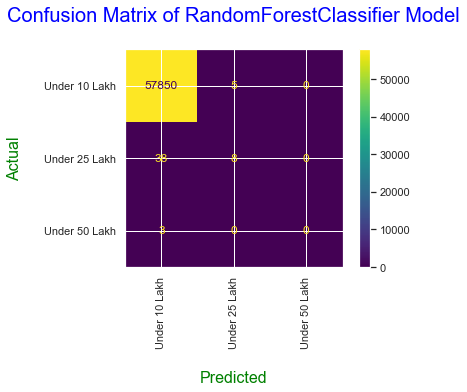

In [93]:
plot_confusion_matrix(modelRF,x_test,y_test)
plt.title('Confusion Matrix of RandomForestClassifier Model\n',fontsize = 20,color = 'blue')
plt.xlabel('\nPredicted',fontsize=16,color = 'green')
plt.ylabel('Actual\n',fontsize = 16, color = 'green')
plt.xticks(rotation = 90)
plt.show()

### Observation :-
* By applying RandomForestClassifier, model accuracy is 99.90%.

### Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
modelNB = MultinomialNB()

In [96]:
modelNB.fit(x_train,y_train)

MultinomialNB()

In [97]:
y_predict4 = modelNB.predict(x_test)

In [98]:
acu_4 = accuracy_score(y_test,y_predict4)*100
acu_4

99.91537717601547

In [99]:
print('NaiveBayes - Classification Report\n')
print(classification_report(y_test,y_predict4))

NaiveBayes - Classification Report

               precision    recall  f1-score   support

Under 10 Lakh       1.00      1.00      1.00     57855
Under 25 Lakh       0.43      0.07      0.11        46
Under 50 Lakh       0.00      0.00      0.00         3

     accuracy                           1.00     57904
    macro avg       0.48      0.36      0.37     57904
 weighted avg       1.00      1.00      1.00     57904



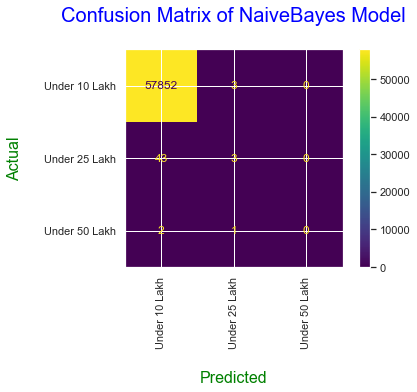

In [100]:
plot_confusion_matrix(modelNB,x_test,y_test)
plt.title('Confusion Matrix of NaiveBayes Model\n',fontsize = 20,color = 'blue')
plt.xlabel('\nPredicted',fontsize=16,color = 'green')
plt.ylabel('Actual\n',fontsize = 16, color = 'green')
plt.xticks(rotation = 90)
plt.show()

### Observation :-
* By applying Naive Bayes, model accuracy is 99.90%.

### Comparing accuracy of each model

In [101]:
accuracy = pd.DataFrame({'Model':['LR','DT','RF','NB'],'Accuracy':[acu_1,acu_2,acu_3,acu_4]})
accuracy   

,Model,Accuracy
0,LR,99.913650
1,DT,99.913650
2,RF,99.920558
3,NB,99.915377


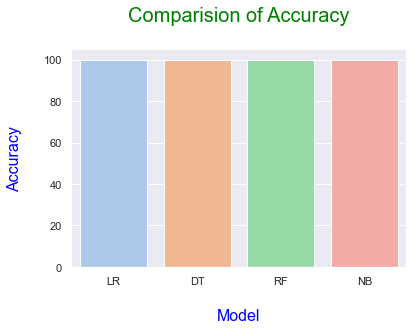

In [102]:
sns.barplot('Model','Accuracy',data = accuracy,palette = 'pastel')
plt.title('Comparision of Accuracy\n',fontsize = 20,color = 'green')
plt.xlabel('\nModel',fontsize = 16,color = 'blue')
plt.ylabel('Accuracy\n',fontsize = 16,color = 'blue')
plt.show()

### Observation :-
* From the above bar plot we can see that LogisticRegression model is providing best accuracy.

### Creating new DataFrame with Actual and Predicted Values Considering LogisticRegression Model

In [103]:
new_df = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})  
new_df

,Actual,Predicted
22523,Under 10 Lakh,Under 10 Lakh
36184,Under 10 Lakh,Under 10 Lakh
84410,Under 10 Lakh,Under 10 Lakh
30644,Under 10 Lakh,Under 10 Lakh
53950,Under 10 Lakh,Under 10 Lakh
...,...,...
1992,Under 10 Lakh,Under 10 Lakh
110580,Under 10 Lakh,Under 10 Lakh
28327,Under 10 Lakh,Under 10 Lakh
69801,Under 10 Lakh,Under 10 Lakh


### Conclusion :

* From the above analysis we can conclude that Delhi has both maximum and minimum priced property listed.
    - Maximum priced property comes at a price of more than 50 lakhs.
    - Minimum priced property comes at a price of under 10 lakhs.
* Most of the properties are listed by the Agents.
* A person can find an Apartment easily in the listed Property_Type.
* There are maximum number of Semi-Furnished properties listed.
* Mumbai has the maximum number of properties listed.
* Most of the properties listed consist of 2 bedrooms with 2 bathrooms. 
* On implementing different classification models on the dataset we have observed that the best model for predicting the Price of a property is LogisticRegression model.
* The model is giving 99.91% accuracy, so we can consider this model for predicting the Price of a property.